In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv(r"H:\Machine Learning\Datasets\census-income_final.csv", skipinitialspace= True)

In [3]:
df= df.replace("?", np.nan)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  Unnamed: 14     32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
Unnamed: 14          0
dtype: int64

In [7]:
df.dropna(inplace= True)

for col in df.columns:
    if df[col].dtypes== 'object':
        df[col]= df[col].fillna(df[col].mode()[0])

In [8]:
df.duplicated().sum()

23

In [9]:
df.drop_duplicates(inplace= True)

In [10]:
df.rename(columns={'Unnamed: 14': 'Income'}, inplace= True)

In [11]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [12]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,30139.000000,3.013900e+04,30139.000000,30139.000000,30139.000000,30139.000000
mean,38.441720,1.897950e+05,10.122532,1092.841202,88.439928,40.934703
std,13.131426,1.056586e+05,2.548738,7409.110596,404.445239,11.978753
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176275e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784170e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376045e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


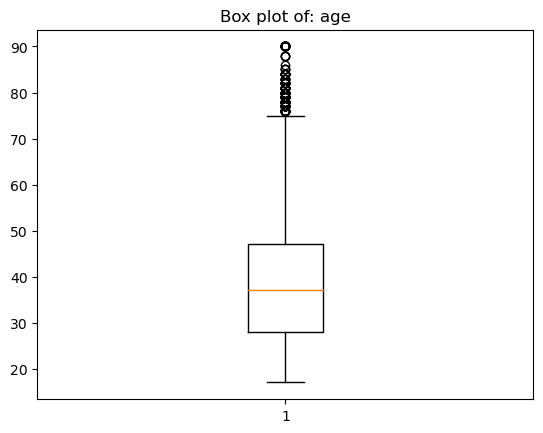

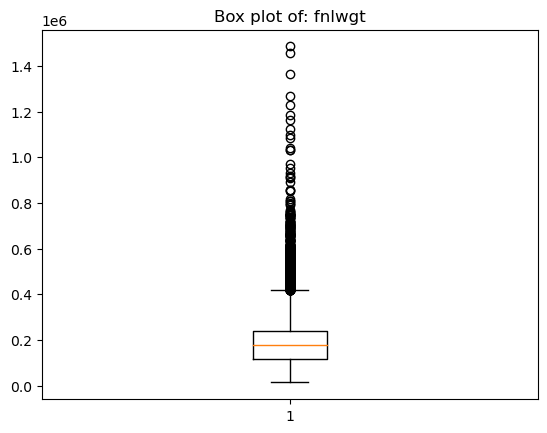

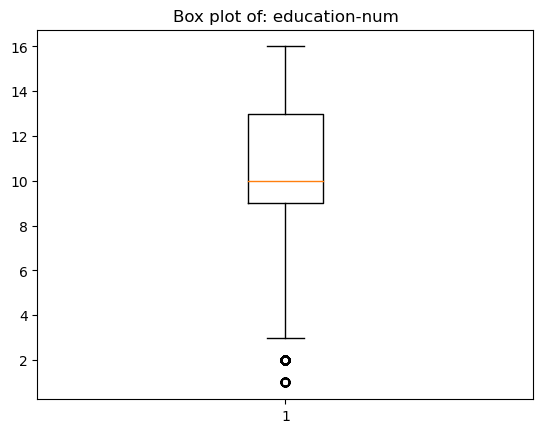

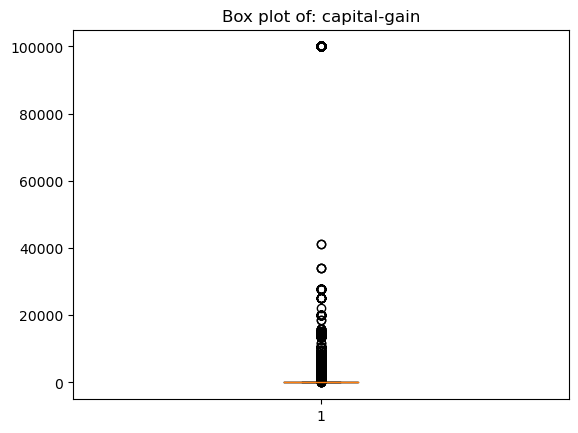

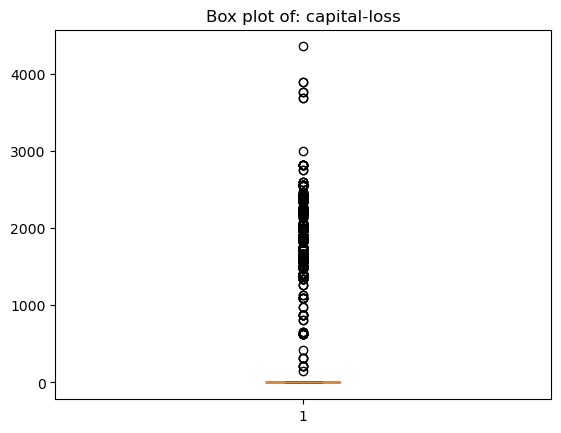

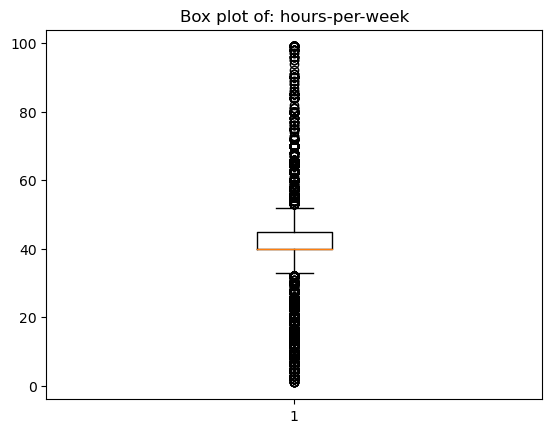

In [13]:
for col in df.columns:
    if df[col].dtypes== 'int64':
        plt.boxplot(df[col])
        plt.title(f'Box plot of: {col}')
        plt.show()

As we have observed from the box plot, the box plot diagram of two columns('capital-gain', 'capital-loss') are not visible suggesting there is maximum number of outliers so we will not use the IQR method on these columns.

In [14]:
col_list= []

for col in df.columns:
    if df[col].dtype!= "object":
        col_list.append(col)

In [15]:
col_list

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [16]:
col_list.remove('capital-gain')

In [17]:
col_list.remove('capital-loss')

In [18]:
col_list

['age', 'fnlwgt', 'education-num', 'hours-per-week']

In [19]:
for col in col_list:
    if df[col].dtypes== 'int64':
        Q1= df[col].quantile(0.25)
        Q3= df[col].quantile(0.75)
        IQR= Q3-Q1
        
        df= df[(df[col]<= Q3+1.5*IQR) & (df[col] >= Q1-1.5*IQR)]

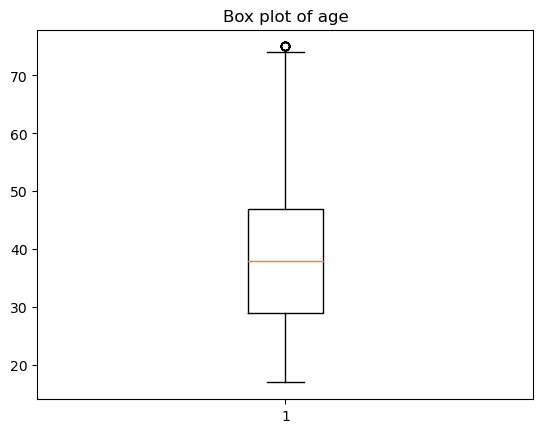

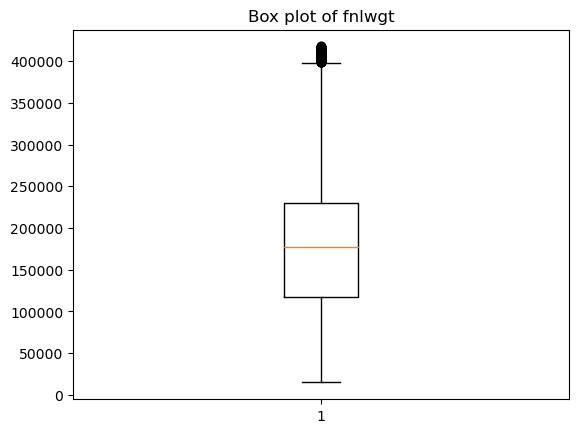

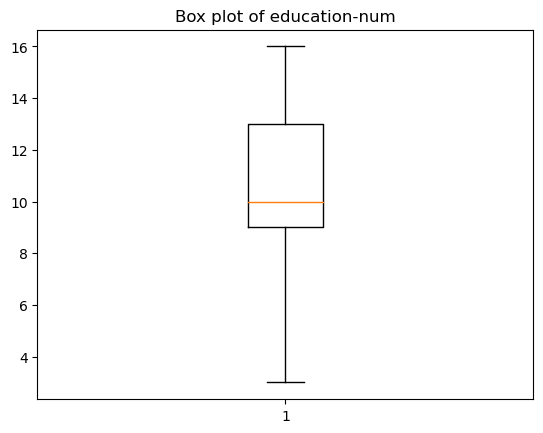

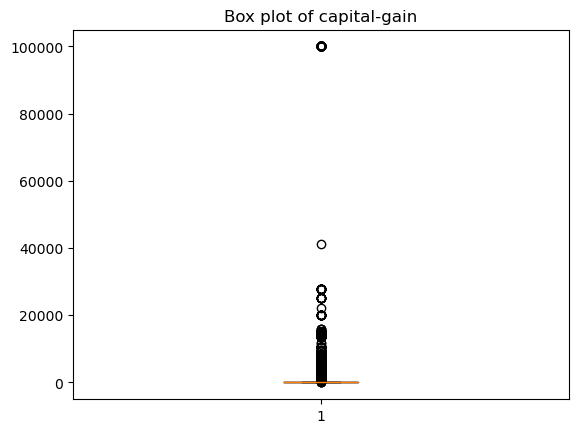

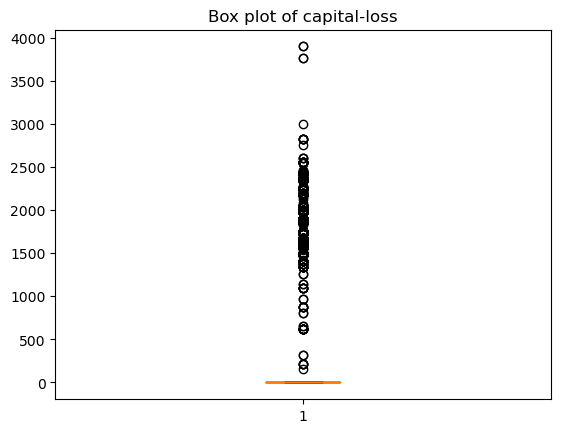

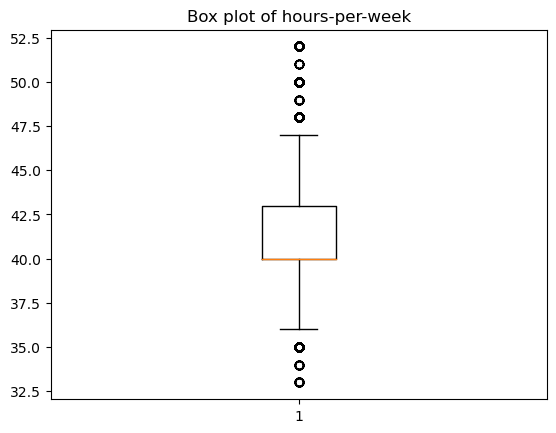

In [20]:
for col in df.columns:
    if df[col].dtypes== 'int64':
        plt.boxplot(df[col])
        plt.title(f'Box plot of {col}')
        plt.show()

<AxesSubplot:xlabel='age', ylabel='Density'>

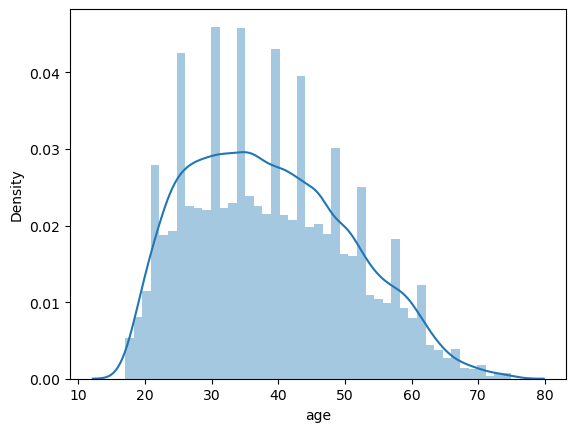

In [21]:
sns.distplot(df.age)

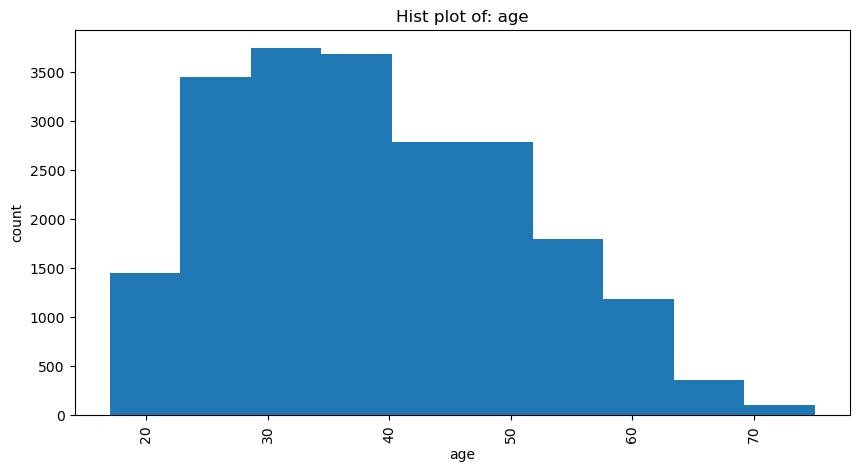

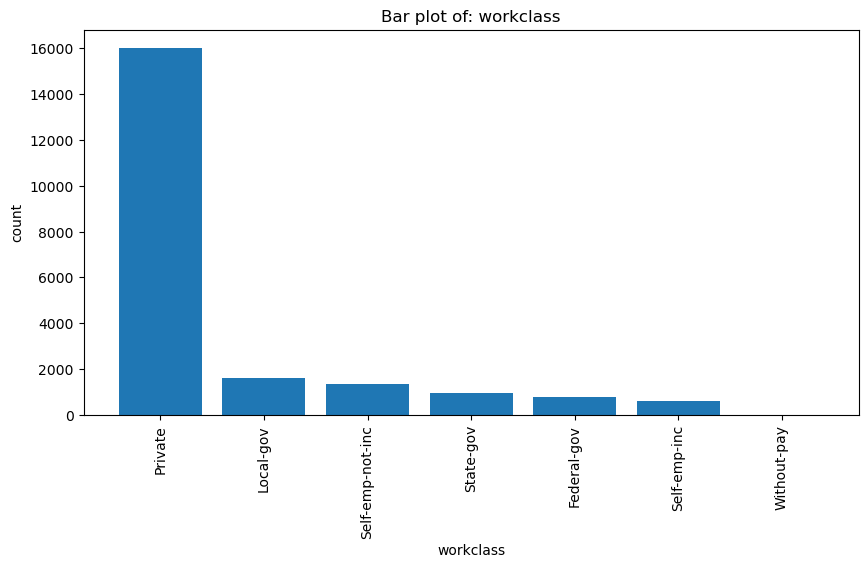

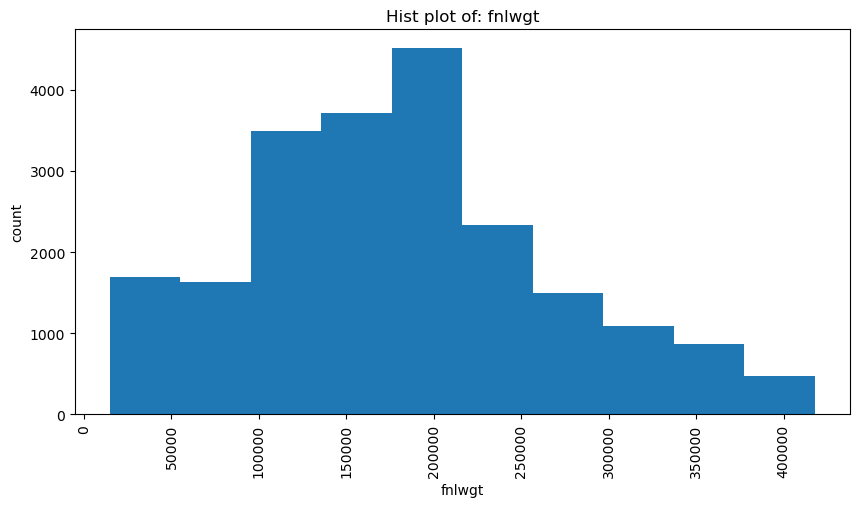

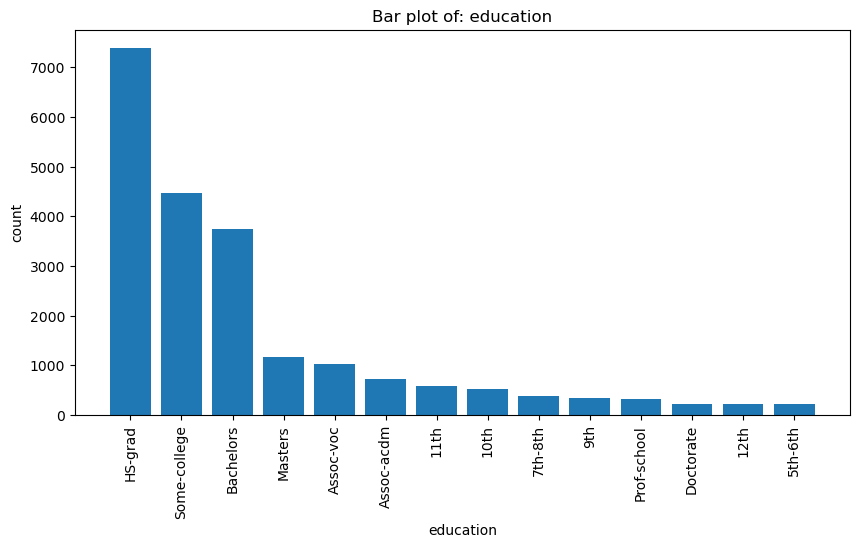

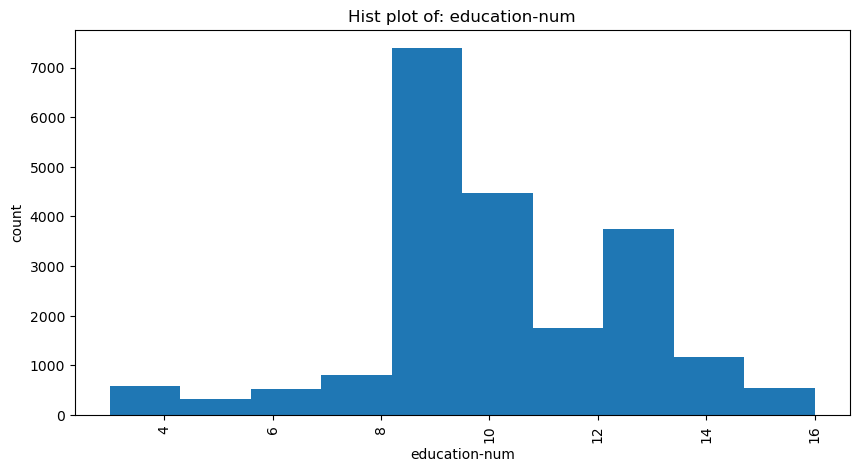

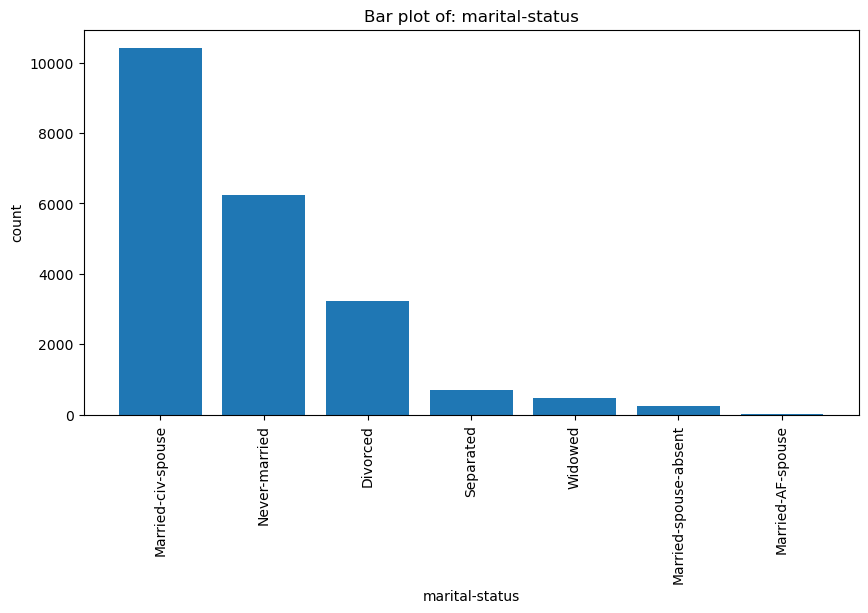

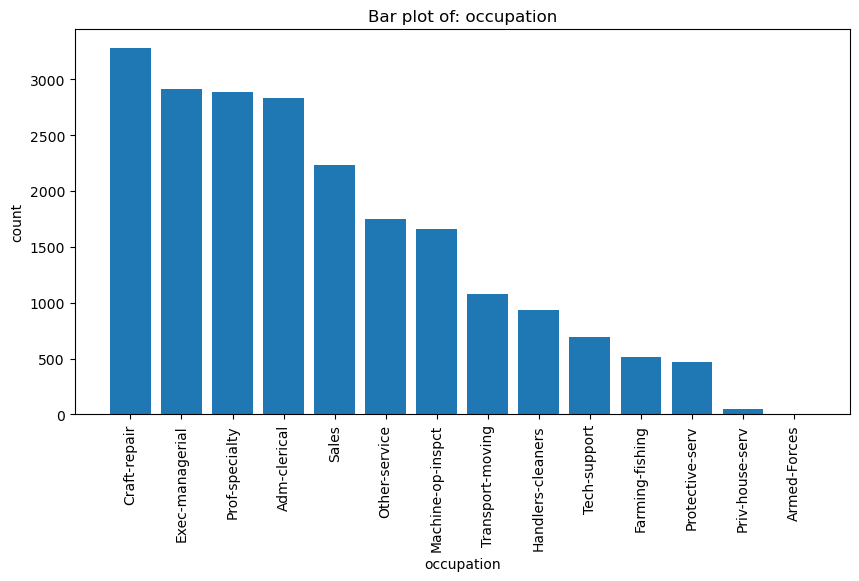

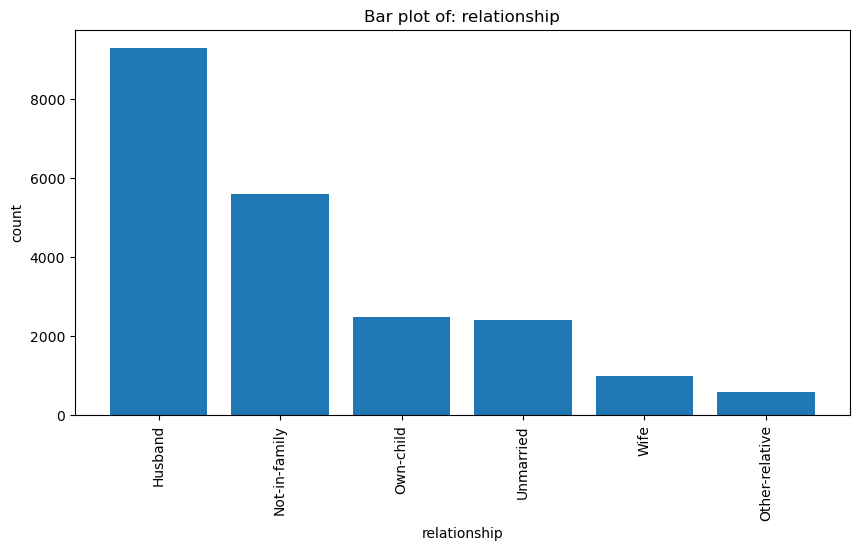

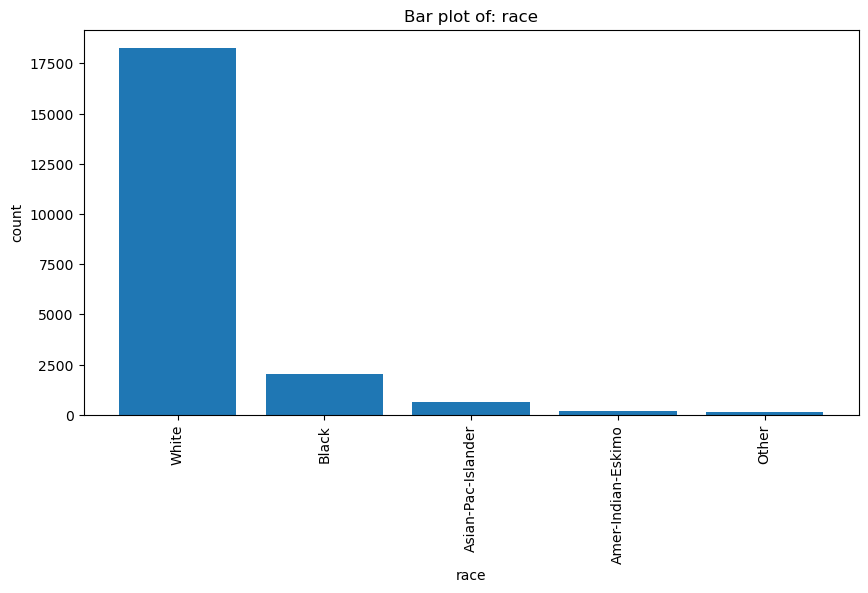

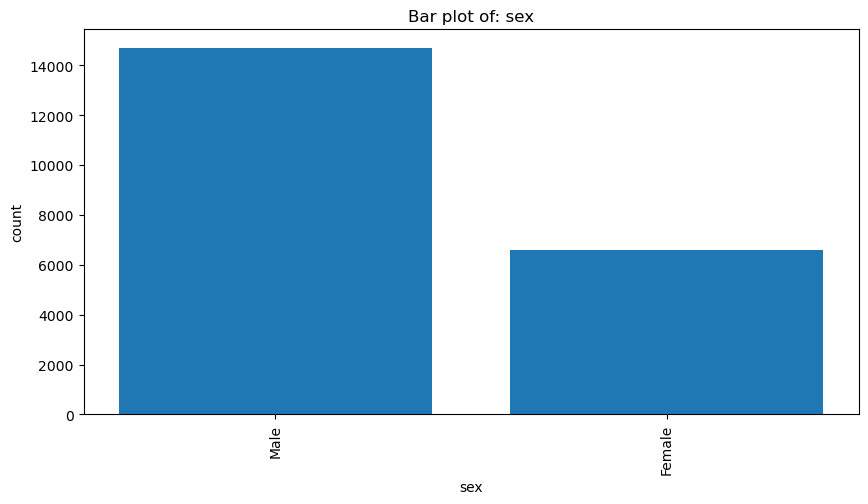

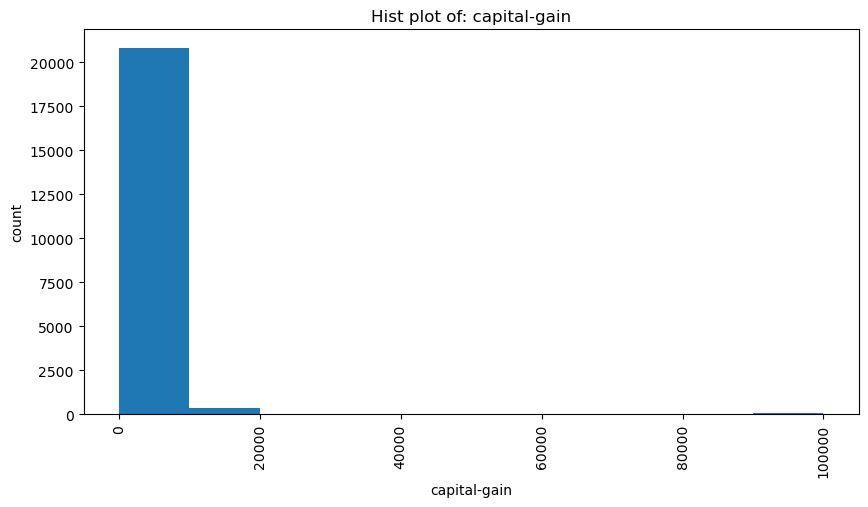

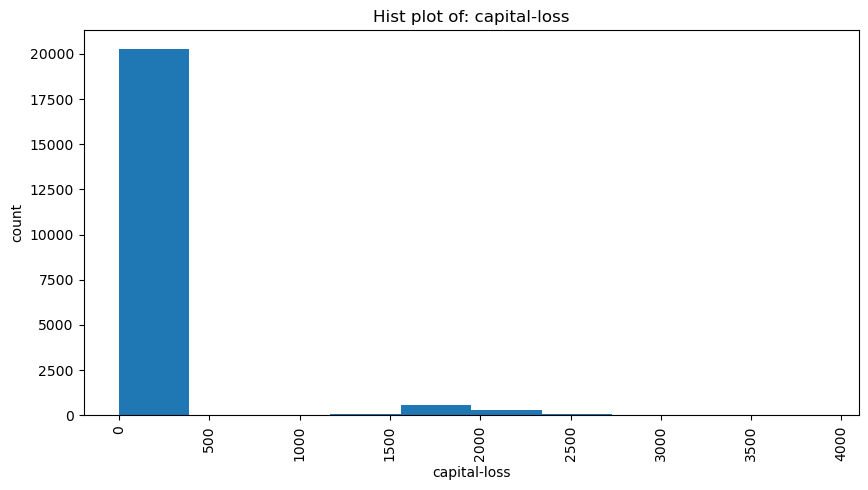

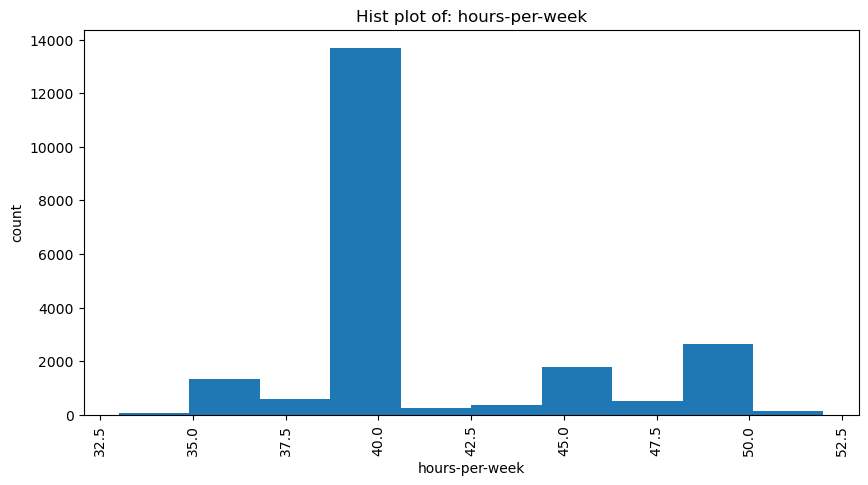

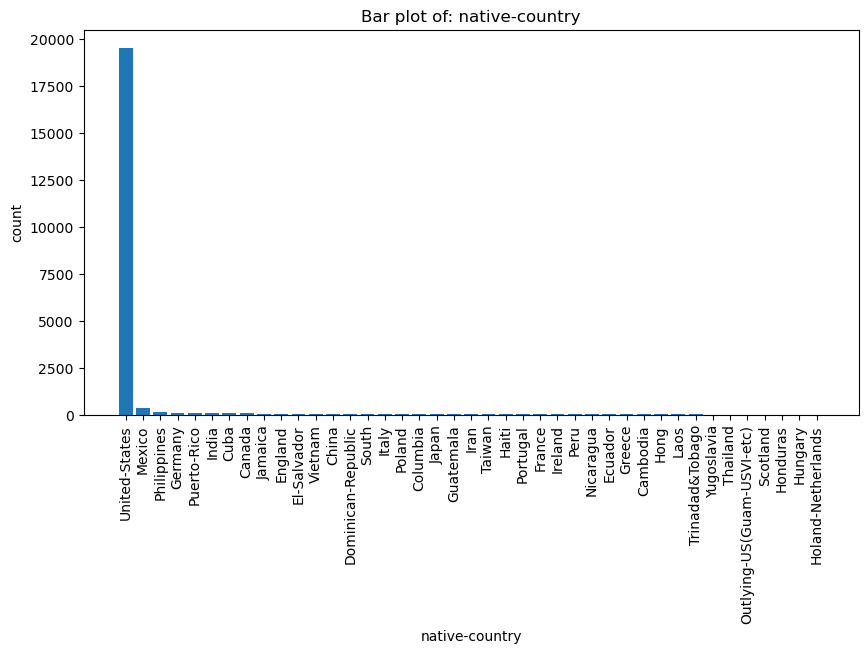

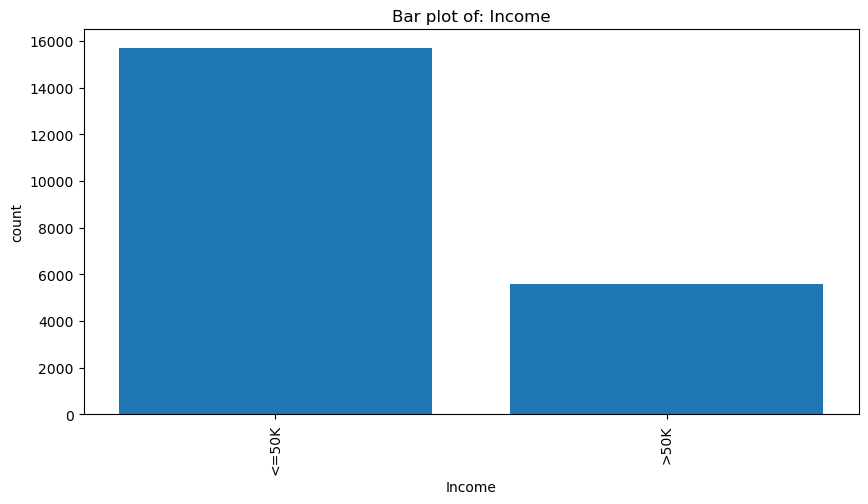

In [22]:
for col in df.columns:
    if df[col].dtype== 'object':
        plt.figure(figsize=(10,5))
        plt.bar(df[col].value_counts().index, df[col].value_counts())
        plt.xlabel(col)
        plt.xticks(rotation=90)
        plt.ylabel('count')
        plt.title(f'Bar plot of: {col}')
        plt.show()
        
    elif df[col].dtype== 'int64':
        plt.figure(figsize=(10,5))
        plt.hist(df[col])
        plt.xlabel(col)
        plt.xticks(rotation=90)
        plt.ylabel('count')
        plt.title(f'Hist plot of: {col}')
        plt.show()

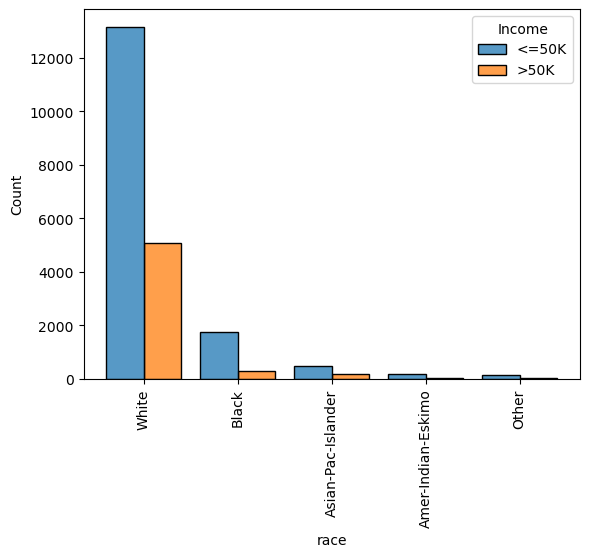

In [23]:
sns.histplot(data=df, x= 'race', hue= 'Income', multiple= 'dodge', shrink=0.8)
plt.xticks(rotation=90)
plt.show()

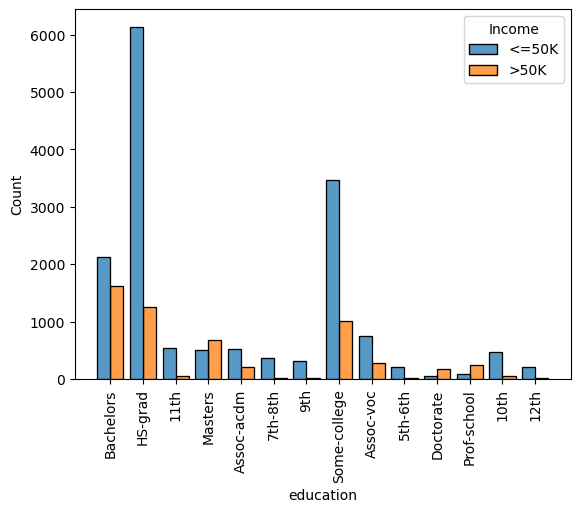

In [24]:
sns.histplot(data= df, x= 'education', hue= 'Income', multiple= 'dodge', shrink= 0.8)
plt.xticks(rotation= 90)
plt.show()

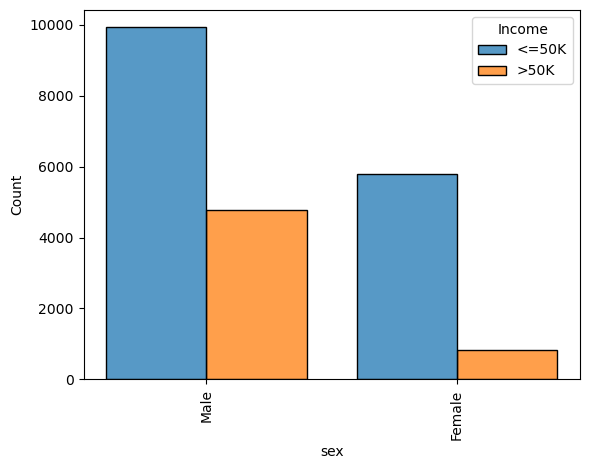

In [25]:
sns.histplot(data= df, x= 'sex', hue= 'Income', multiple= 'dodge', shrink= 0.8)
plt.xticks(rotation=90)
plt.show()

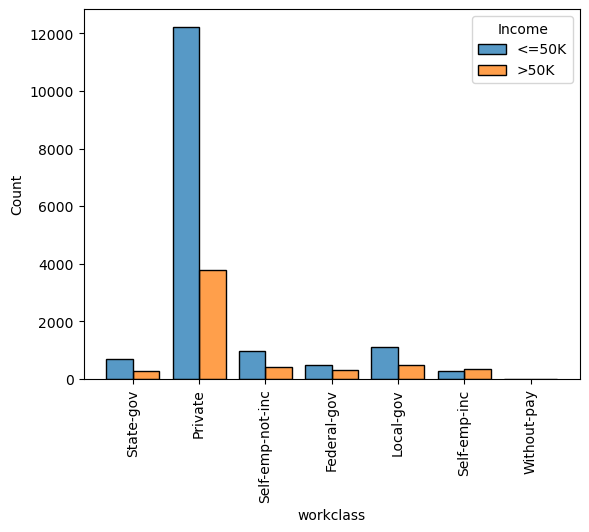

In [26]:
sns.histplot(data= df, x= 'workclass', hue= 'Income', multiple= 'dodge', shrink= 0.8)
plt.xticks(rotation=90)
plt.show()

In [27]:
df['workclass'].value_counts()

Private             16002
Local-gov            1590
Self-emp-not-inc     1364
State-gov             955
Federal-gov           779
Self-emp-inc          623
Without-pay             4
Name: workclass, dtype: int64

In [28]:
mean_workclass= df.groupby('workclass')['capital-gain'].mean()
mean_workclass

workclass
Federal-gov          681.281130
Local-gov            865.909434
Private              835.333396
Self-emp-inc        3994.000000
Self-emp-not-inc    2215.052786
State-gov            636.663874
Without-pay         1104.000000
Name: capital-gain, dtype: float64

In [29]:
us_emp_per = (df[(df['native-country']=='United-States')&(df['workclass']=='Private')&(df['Income']=='<=50K')].shape[0] / df[(df['native-country']=='United-States')].shape[0]) * 100
us_emp_per

56.43153526970954

In [30]:
high_per= (df[(df['education']=='HS-grad') & (df['Income']=='>50K')].shape[0] / df.shape[0]) * 100
high_per

5.8638645212741

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
le= LabelEncoder()

In [33]:
for col in df.columns:
    if df[col].dtypes== 'object':
        df[col]= le.fit_transform(df[col])

In [34]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,5,77516,8,13,4,0,1,4,1,2174,0,40,38,0
2,38,2,215646,10,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,8,13,2,9,5,2,0,0,0,40,4,0
5,37,2,284582,11,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,2,310152,13,10,4,10,1,4,1,0,0,40,38,0
32556,27,2,257302,6,12,2,12,5,4,0,0,0,38,38,0
32557,40,2,154374,10,9,2,6,0,4,1,0,0,40,38,1
32558,58,2,151910,10,9,6,0,4,4,0,0,0,40,38,0


<AxesSubplot:>

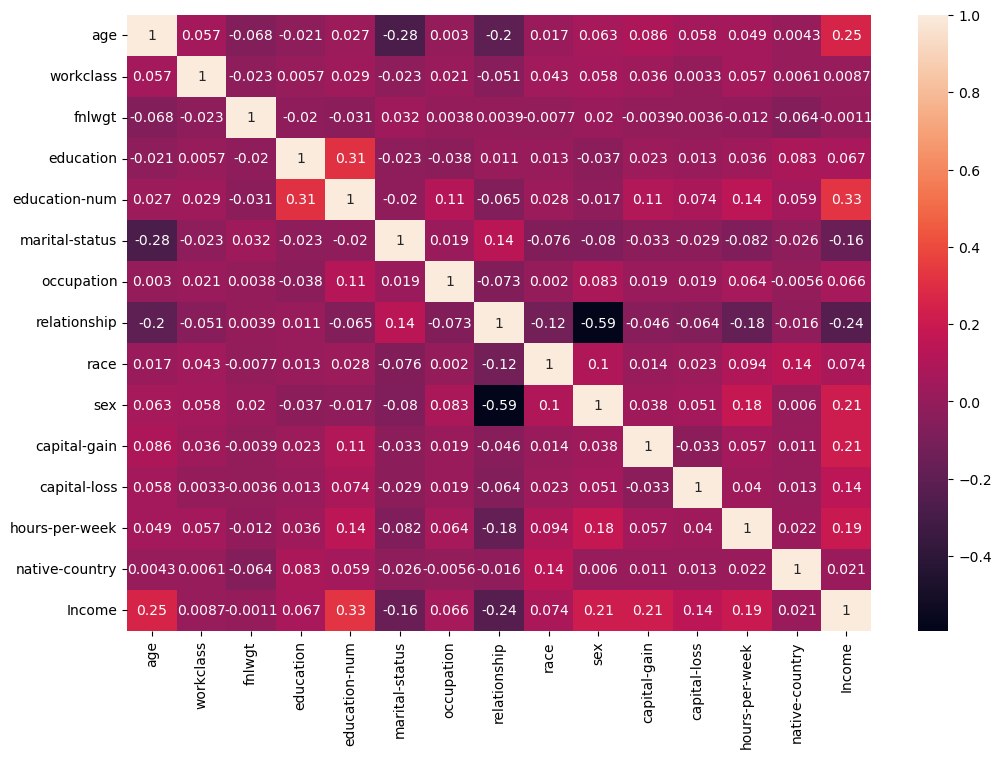

In [35]:
plt.figure(figsize=(12,8))
sns.heatmap(data= df.corr(), annot= True)

Heatmap displayed that there is a significant positive correlation between 'education_num' and 'Income' in comparison to others which shows person with higher 'education_num' tends to have a higher 'Income'. 

In [36]:
x= df.iloc[:, :-1]

In [37]:
x

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,5,77516,8,13,4,0,1,4,1,2174,0,40,38
2,38,2,215646,10,9,0,5,1,4,1,0,0,40,38
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38
4,28,2,338409,8,13,2,9,5,2,0,0,0,40,4
5,37,2,284582,11,14,2,3,5,4,0,0,0,40,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,2,310152,13,10,4,10,1,4,1,0,0,40,38
32556,27,2,257302,6,12,2,12,5,4,0,0,0,38,38
32557,40,2,154374,10,9,2,6,0,4,1,0,0,40,38
32558,58,2,151910,10,9,6,0,4,4,0,0,0,40,38


In [38]:
y= df.iloc[:, -1]

In [39]:
y

0        0
2        0
3        0
4        0
5        0
        ..
32555    0
32556    0
32557    1
32558    0
32560    1
Name: Income, Length: 21317, dtype: int32

In [40]:
print(x.shape)
print(y.shape)

(21317, 14)
(21317,)


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train, x_test, y_train, y_test= train_test_split(x, y, train_size=0.80, random_state= 42)

In [43]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(17053, 14)
(17053,)
(4264, 14)
(4264,)


In [44]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [45]:
x_trn_std= scaler.fit_transform(x_train) 

In [46]:
x_tst_std= scaler.transform(x_test)

# Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

In [48]:
LoR= LogisticRegression()

In [49]:
LoR.fit(x_trn_std, y_train)

LogisticRegression()

In [50]:
LoR_Predictions= LoR.predict(x_tst_std)

In [51]:
LoR_acc= accuracy_score(y_test, LoR_Predictions)
LoR_acc

0.8166041275797373

In [52]:
LoR_Cm= confusion_matrix(y_test, LoR_Predictions)
LoR_Cm

array([[2930,  195],
       [ 587,  552]], dtype=int64)

<AxesSubplot:>

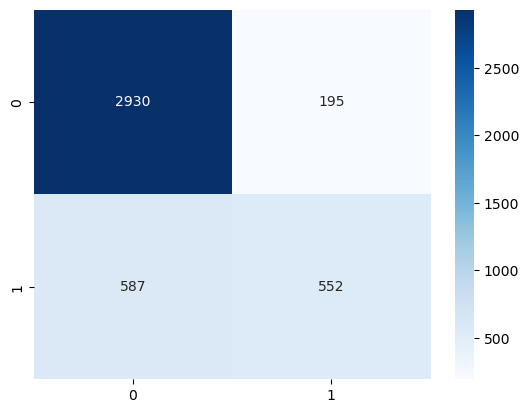

In [53]:
sns.heatmap(LoR_Cm, annot= True, cmap='Blues', fmt='d')

In [54]:
(2930+552)/(2930+195+587+552)

0.8166041275797373

# Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
dt= DecisionTreeClassifier(max_depth= 3)

In [57]:
dt.fit(x_trn_std, y_train)

DecisionTreeClassifier(max_depth=3)

In [58]:
dt_preds= dt.predict(x_tst_std)

In [59]:
dt_acc= accuracy_score(y_test, dt_preds)
dt_acc

0.8311444652908068

In [60]:
dt_cm= confusion_matrix(y_test, dt_preds)
dt_cm

array([[2996,  129],
       [ 591,  548]], dtype=int64)

<AxesSubplot:>

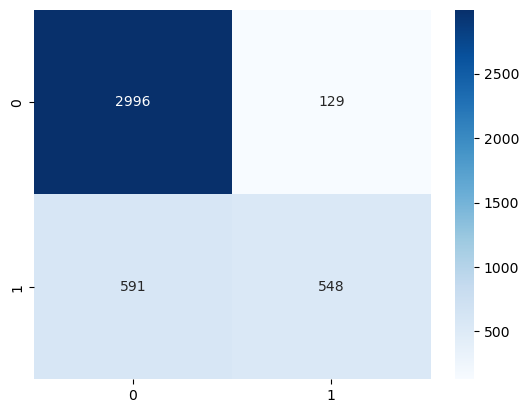

In [61]:
sns.heatmap(dt_cm, annot= True, fmt='d', cmap= "Blues")

In [62]:
(2996+548)/(2996+129+591+548)

0.8311444652908068

# Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rf= RandomForestClassifier(n_estimators= 300)

In [65]:
rf.fit(x_trn_std, y_train)

RandomForestClassifier(n_estimators=300)

In [66]:
rf_preds= rf.predict(x_tst_std)

In [67]:
rf_acc= accuracy_score(y_test, rf_preds)
rf_acc

0.8466228893058161

In [68]:
rf_cm= confusion_matrix(y_test, rf_preds)
rf_cm

array([[2885,  240],
       [ 414,  725]], dtype=int64)

<AxesSubplot:>

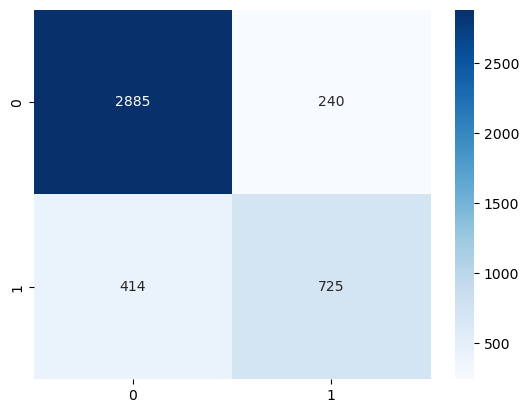

In [69]:
sns.heatmap(rf_cm, annot= True, fmt='d', cmap= 'Blues')

In [70]:
(2885+725)/(2885+240+414+725)

0.8466228893058161

In [71]:
print("Logistic Regression Accuracy:", LoR_acc)
print("Decision Tree Accuracy:", dt_acc)
print("Random Forest Accuracy:", rf_acc)

Logistic Regression Accuracy: 0.8166041275797373
Decision Tree Accuracy: 0.8311444652908068
Random Forest Accuracy: 0.8466228893058161


Random Forest Classifier gave the best accuracy of 84.66%